In [22]:
# Imports
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from random import randint
import matplotlib.pyplot as plt

In [44]:
# Auxillary function to help with layer 2

idealWeights = [0.3,0.1,-0.8,0.3,1.2]

def constFunc(values):
    ans = 0
    for i in range(len(values)):
        ans += values[i]*idealWeights[i]
    return ans + 0.1

# Random initialisation of weightMatrixLayer1 of dimensions 5x5
weightMatrixLayer1 = np.asarray(np.random.rand(5,5), dtype = np.float64)
print(weightMatrixLayer1)

# Ideal function (which is hoping to be mapped)
def calculate(inputAttributes):
    layer1 = np.matmul(inputAttributes,weightMatrixLayer1)
    layer2 = constFunc(layer1)
    return layer2

[[0.61378405 0.49042265 0.40584878 0.22395649 0.68455928]
 [0.8487618  0.28034045 0.28878242 0.40661973 0.45044204]
 [0.97248032 0.78900239 0.153092   0.33597458 0.03395215]
 [0.28724796 0.0804304  0.97786815 0.81262059 0.84422407]
 [0.11979079 0.44461095 0.76201559 0.05149762 0.76381757]]


In [45]:
model = Sequential()
model.add(Dense(5, input_shape = (5,)))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.get_weights()

[array([[-0.7278805 , -0.38182393,  0.2079019 ,  0.5840759 , -0.6043014 ],
        [-0.19748455, -0.60019356, -0.13634354, -0.05020422,  0.19314128],
        [ 0.74193704, -0.5939943 , -0.5412875 , -0.50687677,  0.35061753],
        [ 0.72287667, -0.31397682, -0.46484214,  0.14401746,  0.25964415],
        [ 0.7604289 , -0.13291276,  0.60323465, -0.48533073,  0.48303282]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.2639382 ],
        [ 0.46896267],
        [ 0.05654073],
        [ 0.9089029 ],
        [-0.80352783]], dtype=float32),
 array([0.], dtype=float32)]

In [47]:
# Data Generation for function mapping

x = []
y = []

for samples in range(100000):
    values = np.asarray(np.random.rand(5),dtype = np.float64)
    x.append(values)
    y.append(calculate(values))
print(len(x),"\n\n",x[:5])
print(len(y),"\n\n",y[:5])

100000 

 [array([0.03197347, 0.61077722, 0.58450763, 0.47580806, 0.25641857]), array([0.03597811, 0.31333478, 0.56811051, 0.55902444, 0.45427742]), array([0.49191527, 0.46874017, 0.51150633, 0.92270512, 0.87965528]), array([0.52132597, 0.47342436, 0.14959106, 0.72907538, 0.61261452]), array([0.99295984, 0.77059365, 0.31104192, 0.55324118, 0.97900004])]
100000 

 [1.16338089685686, 1.0747961567563953, 1.9053763602452642, 1.5734254060714468, 2.272109515007021]


In [48]:
# Training
model.compile(optimizer = 'adam', loss = 'mse')
trackingArray = []
for i in range(0,100000,15):
    model.fit(np.asarray(x[i:i+20]),np.asarray(y[i:i+20]))
    trackingArray.append(np.array(model.get_weights()))
print(len(trackingArray))

1/1 [==============================] - 0s 1ms/step - loss: 0.7571


1/1 [==============================] - 0s 883us/step - loss: 0.1883


1/1 [==============================] - 0s 892us/step - loss: 0.1417


1/1 [==============================] - 0s 906us/step - loss: 0.0877


1/1 [==============================] - 0s 1ms/step - loss: 0.0232


1/1 [==============================] - 0s 1ms/step - loss: 0.0300


1/1 [==============================] - 0s 798us/step - loss: 0.0235


1/1 [==============================] - 0s 956us/step - loss: 0.0096


1/1 [==============================] - 0s 961us/step - loss: 0.0057


1/1 [==============================] - 0s 1ms/step - loss: 0.0041


1/1 [==============================] - 0s 905us/step - loss: 0.0060


1/1 [==============================] - 0s 931us/step - loss: 0.0044


1/1 [==============================] - 0s 974us/step - loss: 7.8782e-04


1/1 [==============================] - 0s 835us/step - loss: 6.4376e-04


1/1 [==============================] - 0s 853us/step - loss: 2.3433e-04


1/1 [==============================] - 0s 920us/step - loss: 1.1438e-04


1/1 [==============================] - 0s 1ms/step - loss: 3.5137e-05


1/1 [==============================] - 0s 942us/step - loss: 1.8118e-05


1/1 [==============================] - 0s 924us/step - loss: 4.1675e-06


1/1 [==============================] - 0s 842us/step - loss: 6.1872e-07


1/1 [==============================] - 0s 1ms/step - loss: 1.2542e-07


1/1 [==============================] - 0s 923us/step - loss: 1.5641e-08


1/1 [==============================] - 0s 1ms/step - loss: 1.6346e-09


1/1 [==============================] - 0s 996us/step - loss: 1.3213e-10


1/1 [==============================] - 0s 1ms/step - loss: 9.5316e-12


1/1 [==============================] - 0s 1ms/step - loss: 9.0168e-13


1/1 [==============================] - 0s 2ms/step - loss: 4.0323e-13


1/1 [==============================] - 0s 940us/step - loss: 3.1477e-13


1/1 [==============================] - 0s 870us/step - loss: 2.1991e-13


1/1 [==============================] - 0s 930us/step - loss: 2.1316e-13
6667


In [49]:
npTA = np.array(trackingArray)
print(npTA.shape)

(6667, 4)


In [50]:
print(npTA[0][0][0])

[-0.72888047 -0.38082394  0.20890188  0.5850759  -0.6053014 ]


In [51]:
layer1 = []
biases = []
for b in range(5):
    biases.append([])
for i in range(25):
    layer1.append([])
for i in range(npTA.shape[0]):
    for ind in range(25):
        layer1[ind].append(np.asarray(npTA[i][0][int(ind//5)][ind%5]))
    for ind in range(5):
        biases[ind].append(npTA[i][1][ind])
# a1 = np.asarray(a1)
# print(a1.shape)

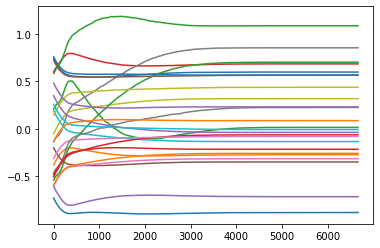

In [52]:
for ind in range(25):
    plt.plot(layer1[ind])


In [53]:
print(weightMatrixLayer1)
print(model.get_weights()[0])

[[0.61378405 0.49042265 0.40584878 0.22395649 0.68455928]
 [0.8487618  0.28034045 0.28878242 0.40661973 0.45044204]
 [0.97248032 0.78900239 0.153092   0.33597458 0.03395215]
 [0.28724796 0.0804304  0.97786815 0.81262059 0.84422407]
 [0.11979079 0.44461095 0.76201559 0.05149762 0.76381757]]
[[-0.88089097 -0.2721601   0.01599294  0.6849193  -0.7142505 ]
 [-0.34829256 -0.31421825  0.85436213  0.31850404 -0.13340534]
 [ 0.5990392  -0.2578121   0.7031027  -0.06275674 -0.03691666]
 [ 0.5653355  -0.07953597  0.22616403  0.4387601  -0.00675846]
 [ 0.5670921   0.08744713  1.0868206  -0.21437141  0.23192616]]


In [55]:
print(idealWeights)
print(model.get_weights()[2])

[0.3, 0.1, -0.8, 0.3, 1.2]
[[ 0.1351099 ]
 [ 0.20869005]
 [ 0.56498307]
 [ 0.86077195]
 [-0.5241515 ]]
